# SAIS Poll-Democratic Candidates
## Heat Map

Will create a heatmap using Seaborn for the tables of SAIS Student's preferences for Democratic candidates by concentration. 


In [1]:
# Import Modules
import seaborn as sns
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

## Percentage of SAIS Students Support for Democratic Candidates by Concentration

Table taken from Stata output (First tab of Excel file). This can be found here:
```python
"/Users/laurieottehenning/Documents/personal/G/SAIS/Spring 2020/Club/Data Visualization/SAIS Election Poll/Stata/Tables"
```

In [29]:
# Set Path to table directory
os.chdir("/Users/laurieottehenning/Documents/personal/G/SAIS/Spring 2020/Club/Data Visualization/SAIS Election Poll/Stata/Tables/")

# Set Graph Ouput path
graph_output = "/Users/laurieottehenning/Documents/personal/G/SAIS/Spring 2020/Club/Data Visualization/SAIS Election Poll/Python/Graph Output"

In [3]:
# Create Dataframe from Table
df1 = pd.read_excel('Tables.xlsx', sheet_name='Table 1', header=[1])

In [4]:
# Drop Column
df1 = df1.drop(['Totals'], axis=1)

In [5]:
df1.columns

Index(['Unnamed: 0', 'Amy Klobuchar', 'Bernie Sanders', 'Elizabeth Warren',
       'Joe Biden', 'Mike Bloomberg', 'Pete Buttigieg'],
      dtype='object')

In [6]:
# Rename column names to only include candidates last names
df1.rename(columns={'Unnamed: 0': 'Concentration', 'Amy Klobuchar': 'KLOBUCHAR', 'Bernie Sanders': 'SANDERS', 
                    'Elizabeth Warren': 'WARREN', 'Joe Biden': 'BIDEN', 
                    'Mike Bloomberg': 'BLOOMBERG', 'Pete Buttigieg': 'BUTTIGIEG'},
                    inplace=True)

In [7]:
# Set 'Concentration' as the index
df1.set_index('Concentration', inplace=True)
df1

,KLOBUCHAR,SANDERS,WARREN,BIDEN,BLOOMBERG,BUTTIGIEG
Concentration,,,,,,
China/Japan/Southeast Asia Studies,0.000000,60.000000,0.000000,20.000000,20.000000,0.000000
Conflict Management/ILaw,0.000000,50.000000,37.500000,0.000000,0.000000,12.500000
ERE,0.000000,40.000000,40.000000,0.000000,0.000000,20.000000
European/Eurasian/Middle East/African Studies,18.181818,18.181818,36.363636,0.000000,0.000000,27.272727
IDEV,14.285714,42.857143,42.857143,0.000000,0.000000,0.000000
IPE/AFP/Global Theory & History,0.000000,44.444444,22.222222,11.111111,11.111111,11.111111
LASP,0.000000,50.000000,25.000000,0.000000,25.000000,0.000000
Strategic Studies,6.250000,6.250000,31.250000,18.750000,25.000000,12.500000


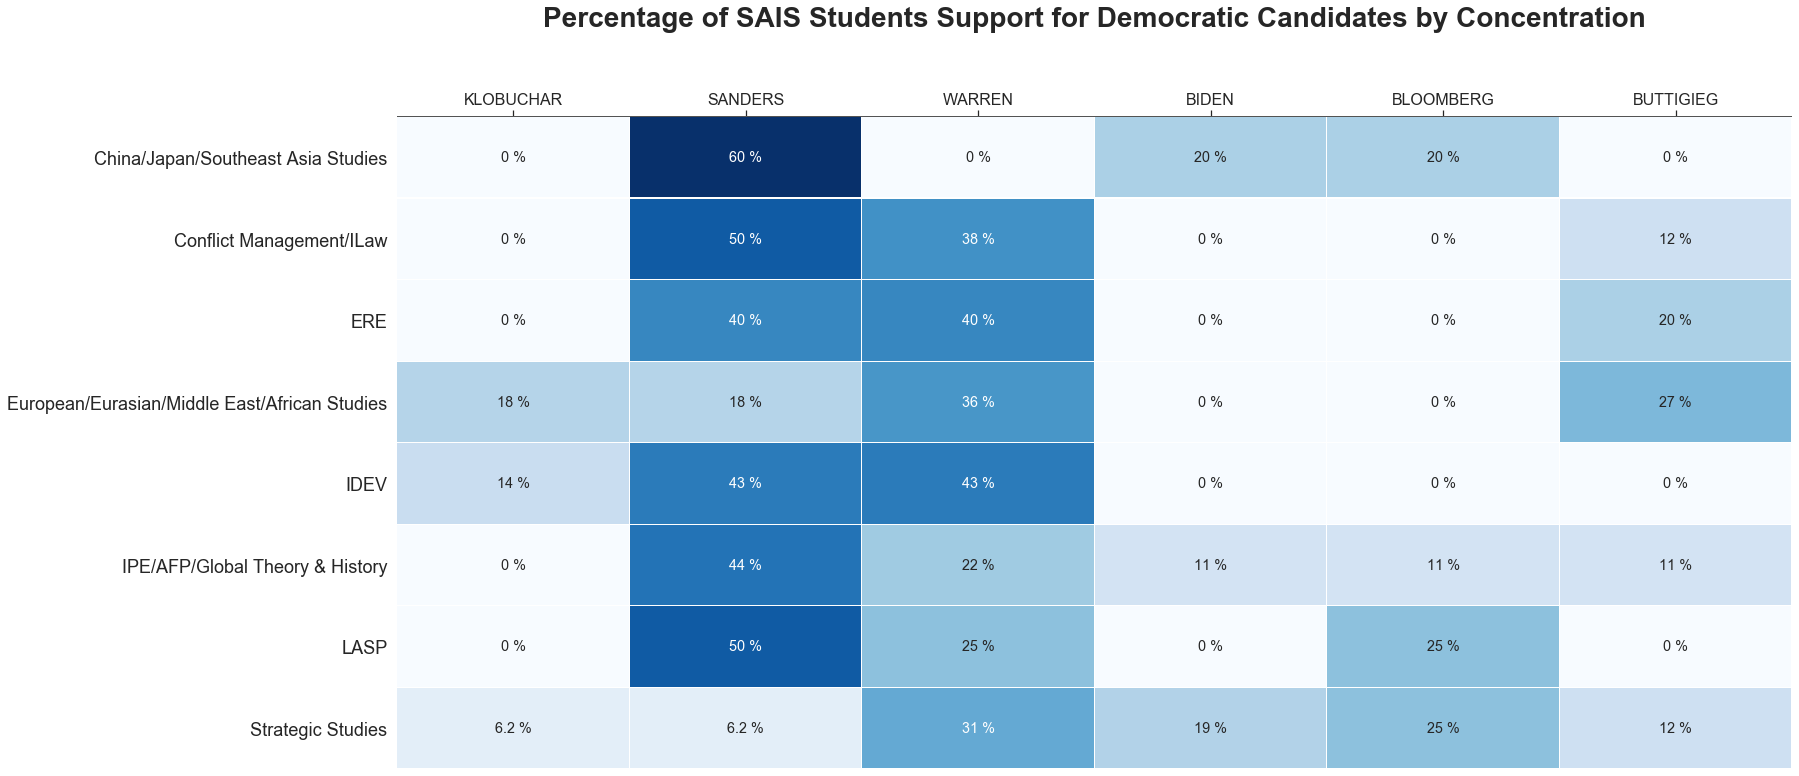

In [23]:
fig, ax = plt.subplots(figsize=(25,12))
sns.set(font_scale=1.2)
p1 = sns.heatmap(df1, cmap="Blues", annot=True, linecolor="white", linewidths=0.1, cbar=False)

# ADDED: Remove labels.
ax.set_ylabel('')

# Font Size of X and Y labels
p1.set_xticklabels(p1.get_xmajorticklabels(), fontsize = 16)
p1.set_yticklabels(p1.get_ymajorticklabels(), fontsize = 18)

# Graph title 
ax.set_title("Percentage of SAIS Students Support for Democratic Candidates by Concentration", 
fontsize=28, fontweight="bold")

rcParams['axes.titlepad'] = 90 # Space between the title and graph
locs, labels = plt.yticks() # Rotating row labels
plt.setp(labels, rotation=0) # Rotating row labels

# Put y axis label on top
plt.tick_params(axis='y', labelbottom = True)

# x axis on top
ax.xaxis.tick_top() 
ax.xaxis.set_label_position('top')

# Put line underneath x-axes labels
ax.hlines([0], *ax.get_xlim())

# Add Percent Sign to each number
for t in p1.texts: t.set_text(t.get_text() + " %")
p1
p1.figure.savefig(graph_output + "/Dem Support Table.png", bbox_inches='tight')

## Most Likely Candidate by Concentration

Table taken from Stata output (Second table of Excel file). This can be found here:
```python
"/Users/laurieottehenning/Documents/personal/G/SAIS/Spring 2020/Club/Data Visualization/SAIS Election Poll/Stata/Tables"
```

In [9]:
# Create Dataframe from Table
df2 = pd.read_excel('Tables.xlsx', sheet_name=1, header=[1])

In [10]:
df2

,Unnamed: 0,Amy Klobuchar,Bernie Sanders,Elizabeth Warren,Joe Biden,Mike Bloomberg,Pete Buttigieg,Totals
0,China/Japan/Southeast Asia Studies,0,100.000000,0.000000,0.000000,0.000000,0.000000,100.0
1,Conflict Management/ILaw,0,75.000000,0.000000,0.000000,12.500000,12.500000,100.0
2,ERE,0,83.333333,0.000000,0.000000,16.666667,0.000000,100.0
3,European/Eurasian/Middle East/African Studies,0,72.727273,0.000000,18.181818,9.090909,0.000000,100.0
4,IDEV,0,71.428571,0.000000,0.000000,14.285714,14.285714,100.0
5,IPE/AFP/Global Theory & History,0,77.777778,11.111111,0.000000,11.111111,0.000000,100.0
6,LASP,0,50.000000,0.000000,25.000000,25.000000,0.000000,100.0
7,Strategic Studies,0,70.588235,11.764706,5.882353,0.000000,11.764706,100.0


In [11]:
# Drop Column
df2 = df2.drop(['Totals'], axis=1)

In [12]:
df2.columns

Index(['Unnamed: 0', 'Amy Klobuchar', 'Bernie Sanders', 'Elizabeth Warren',
       'Joe Biden', 'Mike Bloomberg', 'Pete Buttigieg'],
      dtype='object')

In [13]:
# Rename column names to only include candidates last names
df2.rename(columns={'Unnamed: 0': 'Concentration', 'Amy Klobuchar': 'KLOBUCHAR', 'Bernie Sanders': 'SANDERS', 
                    'Elizabeth Warren': 'WARREN', 'Joe Biden': 'BIDEN', 
                    'Mike Bloomberg': 'BLOOMBERG', 'Pete Buttigieg': 'BUTTIGIEG'},
                    inplace=True)

In [14]:
# Set 'Concentration' as the index
df2.set_index('Concentration', inplace=True)
df2

,KLOBUCHAR,SANDERS,WARREN,BIDEN,BLOOMBERG,BUTTIGIEG
Concentration,,,,,,
China/Japan/Southeast Asia Studies,0,100.000000,0.000000,0.000000,0.000000,0.000000
Conflict Management/ILaw,0,75.000000,0.000000,0.000000,12.500000,12.500000
ERE,0,83.333333,0.000000,0.000000,16.666667,0.000000
European/Eurasian/Middle East/African Studies,0,72.727273,0.000000,18.181818,9.090909,0.000000
IDEV,0,71.428571,0.000000,0.000000,14.285714,14.285714
IPE/AFP/Global Theory & History,0,77.777778,11.111111,0.000000,11.111111,0.000000
LASP,0,50.000000,0.000000,25.000000,25.000000,0.000000
Strategic Studies,0,70.588235,11.764706,5.882353,0.000000,11.764706


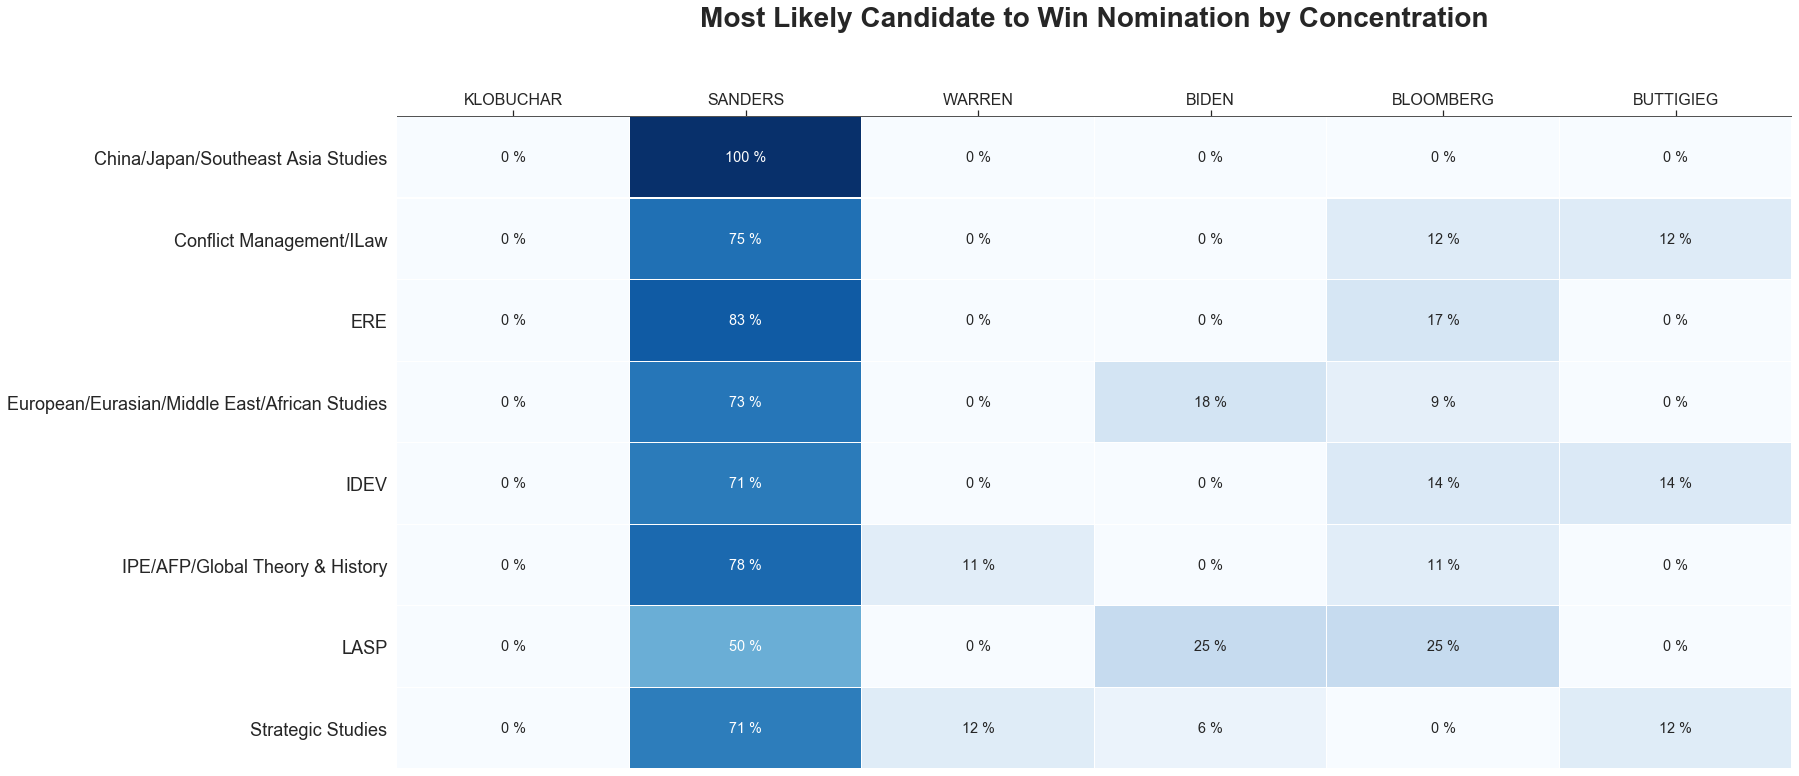

In [24]:
fig, ax = plt.subplots(figsize=(25,12))
sns.set(font_scale=1.2)
p2 = sns.heatmap(df2, cmap="Blues", annot=True, linecolor="white", linewidths=0.1, cbar=False, fmt='.0f')

# ADDED: Remove labels.
ax.set_ylabel('')

# Font Size of X and Y labels
p2.set_xticklabels(p1.get_xmajorticklabels(), fontsize = 16)
p2.set_yticklabels(p1.get_ymajorticklabels(), fontsize = 18)

# Graph title 
ax.set_title("Most Likely Candidate to Win Nomination by Concentration", 
fontsize=28, fontweight="bold")

rcParams['axes.titlepad'] = 90 # Space between the title and graph
locs, labels = plt.yticks() # Rotating row labels
plt.setp(labels, rotation=0) # Rotating row labels

# Put y axis label on top
plt.tick_params(axis='y', labelbottom = True)

# x axis on top
ax.xaxis.tick_top() 
ax.xaxis.set_label_position('top')

# Put line underneath x-axes labels
ax.hlines([0], *ax.get_xlim())

# Add Percent Sign to each number
for t in p2.texts: t.set_text(t.get_text() + " %")
p2
p2.figure.savefig(graph_output + "/Most Likely Candidate Table.png", bbox_inches='tight')

## Liklihood Trump Gets Reelected

Table taken from Stata output (Third table of Excel file). This can be found here:
```python
"/Users/laurieottehenning/Documents/personal/G/SAIS/Spring 2020/Club/Data Visualization/SAIS Election Poll/Stata/Tables"
```

In [16]:
# Create Dataframe from Table
df3 = pd.read_excel('Tables.xlsx', sheet_name=2, header=[1])

In [17]:
df3

,Unnamed: 0,Definitely Reelected,Probably Reelected,Unsure,Probably Lose,Definitely Lose,Totals
0,China/Japan/Southeast Asia Studies,0.000000,80.000000,20.000000,0.000000,0,100.0
1,Conflict Management/ILaw,12.500000,25.000000,37.500000,25.000000,0,100.0
2,ERE,0.000000,16.666667,50.000000,33.333333,0,100.0
3,European/Eurasian/Middle East/African Studies,27.272727,36.363636,36.363636,0.000000,0,100.0
4,IDEV,0.000000,71.428571,28.571429,0.000000,0,100.0
5,IPE/AFP/Global Theory & History,0.000000,44.444444,44.444444,11.111111,0,100.0
6,LASP,50.000000,25.000000,25.000000,0.000000,0,100.0
7,Strategic Studies,5.882353,52.941176,35.294118,5.882353,0,100.0


In [18]:
# Drop Column
df3 = df3.drop(['Totals'], axis=1)

In [19]:
df3.columns

Index(['Unnamed: 0', 'Definitely Reelected', 'Probably Reelected', 'Unsure',
       'Probably Lose', 'Definitely Lose'],
      dtype='object')

In [20]:
# Rename column names to only include candidates last names
df3.rename(columns={'Unnamed: 0': 'Concentration', 'Definitely Reelected': 'DEFINITELY REELECTION', 
                    'Probably Reelected': 'PROBABLY REELECTED', 'Unsure': 'UNSURE', 
                    'Probably Lose': 'PROBABLY LOSE', 'Definitely Lose': 'DEFINITELY LOSE'}, inplace=True)

In [21]:
# Set 'Concentration' as the index
df3.set_index('Concentration', inplace=True)
df3

,DEFINITELY REELECTION,PROBABLY REELECTED,UNSURE,PROBABLY LOSE,DEFINITELY LOSE
Concentration,,,,,
China/Japan/Southeast Asia Studies,0.000000,80.000000,20.000000,0.000000,0
Conflict Management/ILaw,12.500000,25.000000,37.500000,25.000000,0
ERE,0.000000,16.666667,50.000000,33.333333,0
European/Eurasian/Middle East/African Studies,27.272727,36.363636,36.363636,0.000000,0
IDEV,0.000000,71.428571,28.571429,0.000000,0
IPE/AFP/Global Theory & History,0.000000,44.444444,44.444444,11.111111,0
LASP,50.000000,25.000000,25.000000,0.000000,0
Strategic Studies,5.882353,52.941176,35.294118,5.882353,0


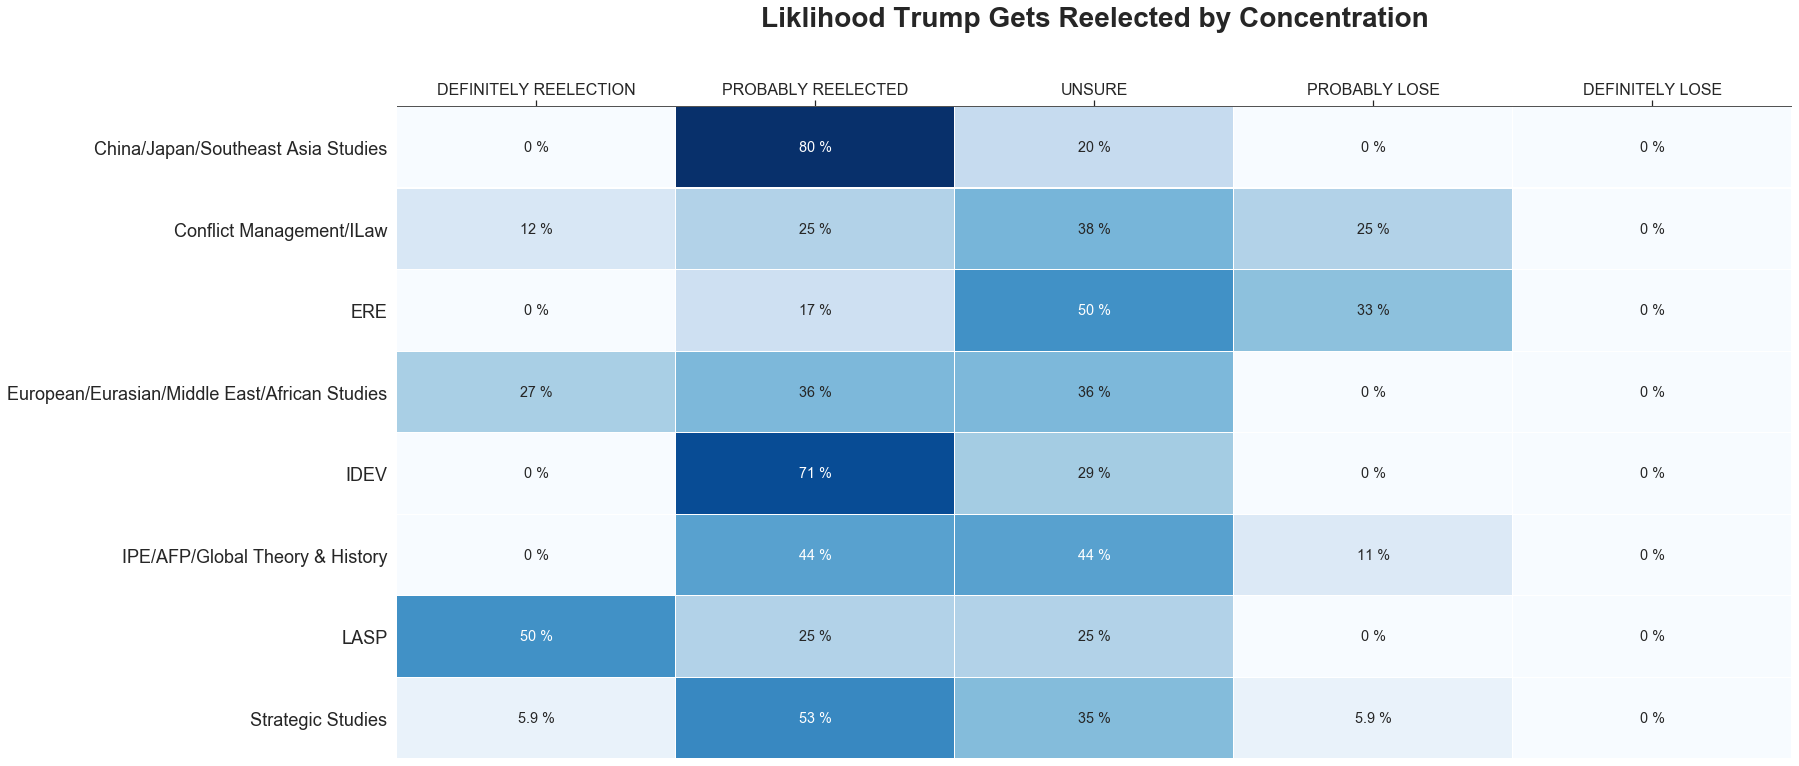

In [22]:
fig, ax = plt.subplots(figsize=(25,12))
sns.set(font_scale=1.2)
p3 = sns.heatmap(df3, cmap="Blues", annot=True, linecolor="white", linewidths=0.1, cbar=False)

# ADDED: Remove labels.
ax.set_ylabel('')

# Font Size of X and Y labels
p3.set_xticklabels(p3.get_xmajorticklabels(), fontsize = 16)
p3.set_yticklabels(p3.get_ymajorticklabels(), fontsize = 18)

# Graph title 
ax.set_title("Liklihood Trump Gets Reelected by Concentration", 
fontsize=28, fontweight="bold")

rcParams['axes.titlepad'] = 90 # Space between the title and graph
locs, labels = plt.yticks() # Rotating row labels
plt.setp(labels, rotation=0) # Rotating row labels

# Put y axis label on top
plt.tick_params(axis='y', labelbottom = True)

# x axis on top
ax.xaxis.tick_top() 
ax.xaxis.set_label_position('top')

# Put line underneath x-axes labels
ax.hlines([0], *ax.get_xlim())

# Add Percent Sign to each number
for t in p3.texts: t.set_text(t.get_text() + " %")
p3
p3.figure.savefig(graph_output + "/Liklihood Trump Gets Reelected.png", bbox_inches='tight')

## Pie Chart of Total Support for Candidates at SAIS

Raw Data taken from the Google Survey

```python
"/Users/laurieottehenning/Documents/personal/G/SAIS/Spring 2020/Club/Data Visualization/SAIS Election Poll/Stata/Raw Data"
```

### Pie Chart of the "Total Support for Democratic Candidates"

In [33]:
dfpie = pd.read_excel("Pie Charts.xlsx")

In [34]:
dfpie

,support_dem,ifdem_notvote,mostlikely_dem,chance_trump_win
0,Elizabeth Warren,NaN,Bernie Sanders,3
1,Pete Buttigieg,NaN,Bernie Sanders,3
2,Bernie Sanders,NaN,Bernie Sanders,4
3,Bernie Sanders,NaN,Bernie Sanders,4
4,Bernie Sanders,NaN,Joe Biden,1
...,...,...,...,...
62,Undecided,I will still vote for the Democrat,Mike Bloomberg,2
63,Undecided,I will still vote for the Democrat,Pete Buttigieg,2
64,Pete Buttigieg,I will still vote for the Democrat,Bernie Sanders,2
65,Elizabeth Warren,I will still vote for the Democrat,Mike Bloomberg,1


In [53]:
# Limit to one category (Support for Democrats)
df_int = dfpie[['support_dem']]

In [54]:
# Collapse data
df_int['Num'] = 1
df_demsum = df_int.groupby("support_dem", as_index=False)["Num"].count()

/Users/laurieottehenning/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [55]:
df_demsum

,support_dem,Num
0,Amy Klobuchar,4
1,Bernie Sanders,21
2,Elizabeth Warren,20
3,Joe Biden,5
4,Mike Bloomberg,7
5,Pete Buttigieg,8
6,Undecided,2


In [67]:
from matplotlib import cm
import numpy as np

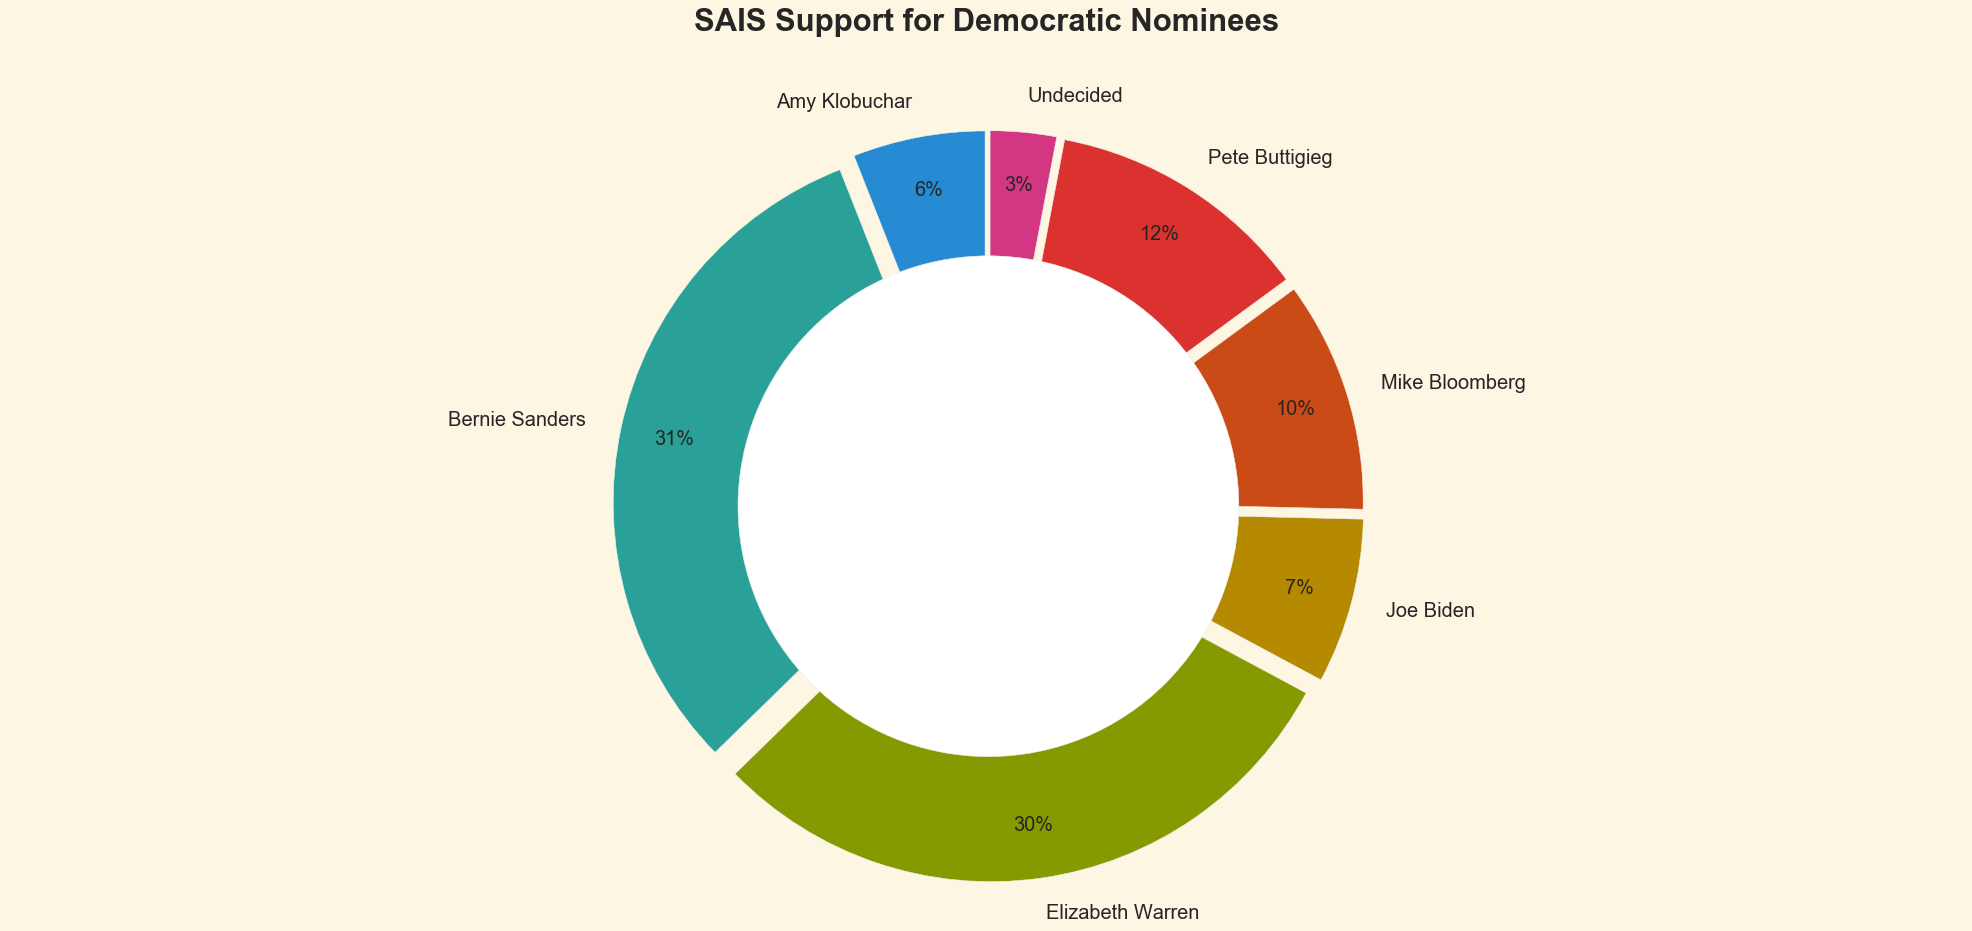

In [117]:
# Create Pie Chart
cs = plt.style.use('Solarize_Light2')

#explsion
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05)

rcParams['axes.titlepad'] = 90 # Space between the title and graph
rcParams['font.size'] = 18

# Title and Size of Plot
fig1, ax1 = plt.subplots(figsize=(25,12))
ax1.set_title("SAIS Support for Democratic Nominees", 
fontsize=28, fontweight="bold")

# Background color
#fig1.set_facecolor('black')
 
plt.pie(df_demsum['Num'], labels=df_demsum['support_dem'], colors=cs,
         autopct='%.0f%%', startangle=90, pctdistance=0.85, explode = explode)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

ax1.figure.savefig(graph_output + "/Support for Democratic Nominees.png")

In [71]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']
